In [1]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

In [6]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

        f.savefig("fig_out.png")

In [7]:
transform = A.Compose([
    A.GaussianBlur(blur_limit=(3, 7), sigma_limit=0, always_apply=False, p=0.5),
    A.Flip(always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.RandomBrightnessContrast(always_apply=False, p=0.5),
    A.RandomShadow(shadow_roi=(0, 0.5, 0.5, 0.5), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, always_apply=False, p=0.5),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), always_apply=False, p=0.5),
    A.Rotate(limit=45, interpolation=1, border_mode=1, value=None, mask_value=None, rotate_method='largest_box', crop_border=False, always_apply=False, p=0.5),
])

In [8]:
image = cv2.imread("multiple_rgby_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread("multiple_rgby_01.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

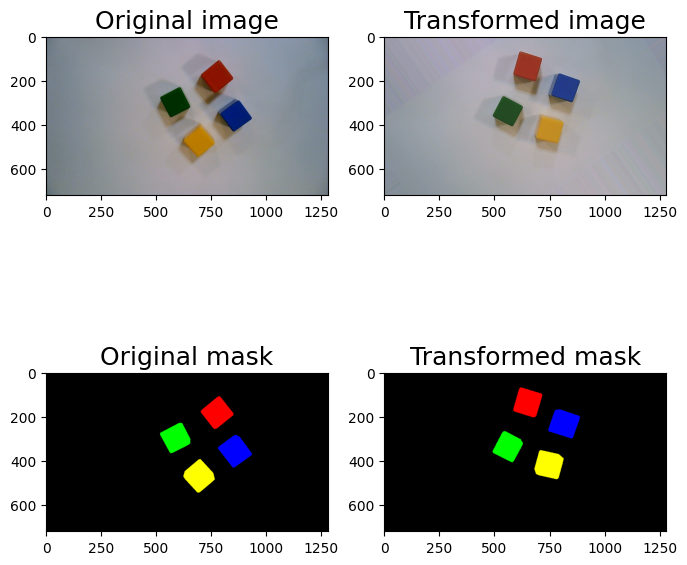

In [9]:
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

visualize(transformed_image, transformed_mask, original_image=image, original_mask=mask)